<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/DL/4_1_%D0%9C%D0%B5%D1%85%D0%B0%D0%BD%D0%B8%D0%B7%D0%BC_%D0%B2%D0%BD%D0%B8%D0%BC%D0%B0%D0%BD%D0%B8%D1%8F_(Attention_Mechanism)_%D0%B2_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8F%D1%85_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4.1. Механизм внимания (Attention Mechanism) в моделях LSTM


### 1. **Предпосылки**

Перед тем как углубиться в детали механизма внимания, необходимо напомнить ключевые элементы архитектуры LSTM, так как внимание накладывается поверх базовых процессов LSTM.

LSTM работает с последовательностями длины $T$, принимая на каждом шаге $t$ вход $x_t$ и скрытое состояние $h_t$, которое зависит от предыдущего скрытого состояния $h_{t-1}$ и состояния ячейки памяти $c_{t-1}$.

Основные обновления скрытого состояния и состояния ячейки памяти LSTM описываются следующими формулами:

- Входной затвор (input gate):
  $$
  i_t = \sigma(W_i x_t + U_i h_{t-1} + b_i)
  $$
- Забывающий затвор (forget gate):
  $$
  f_t = \sigma(W_f x_t + U_f h_{t-1} + b_f)
  $$
- Затвор вывода (output gate):
  $$
  o_t = \sigma(W_o x_t + U_o h_{t-1} + b_o)
  $$
- Обновление состояния ячейки памяти:
  $$
  \tilde{c}_t = \tanh(W_c x_t + U_c h_{t-1} + b_c)
  $$
- Обновленное состояние ячейки:
  $$
  c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c}_t
  $$
- Обновленное скрытое состояние:
  $$
  h_t = o_t \odot \tanh(c_t)
  $$

Где $\sigma$ — сигмоида, $\odot$ — поэлементное умножение, а $\tanh$ — гиперболический тангенс.

LSTM хранит информацию в скрытых состояниях и ячейках памяти, но стандартная архитектура плохо масштабируется при обработке очень длинных последовательностей, поскольку важно учитывать все прошлые шаги $t$. Здесь на помощь приходит механизм внимания.

### 2. **Механизм внимания**

Механизм внимания позволяет модели фокусироваться на определённых шагах последовательности входных данных при генерации каждого выходного состояния. Математически, механизм внимания вводится с помощью контекстного вектора, который агрегирует информацию из всех временных шагов, взвешенных в зависимости от их важности для текущего состояния.

#### 2.1. **Контекстный вектор**

Контекстный вектор $c_t$ на каждом шаге $t$ вычисляется как взвешенная сумма всех скрытых состояний $h_k$, где $k = 1, 2, \dots, T$:

$$
c_t = \sum_{k=1}^{T} \alpha_{tk} h_k
$$

Здесь $\alpha_{tk}$ — это вес, который показывает, насколько важным является скрытое состояние $h_k$ для текущего шага $t$. Эти веса называются *вниманием*.

#### 2.2. **Выбор весов внимания (scoring function)**

Для вычисления весов внимания используются различные функции сопоставления, также известные как *функции оценки*. Наиболее популярные функции включают:

- **Скалярное произведение (dot product)**:
  $$
  e_{tk} = h_t^\top h_k
  $$
  
- **Билинейная форма (bilinear)**:
  $$
  e_{tk} = h_t^\top W_a h_k
  $$
  где $W_a$ — обучаемая матрица.

- **Аддитивная форма (additive)**:
  $$
  e_{tk} = v_a^\top \tanh(W_t h_t + W_k h_k)
  $$
  где $v_a$, $W_t$, $W_k$ — обучаемые параметры.

#### 2.3. **Softmax для получения весов внимания**

После того как мы получили оценки внимания $e_{tk}$, применим Softmax для нормализации значений и получения весов внимания $\alpha_{tk}$:

$$
\alpha_{tk} = \frac{\exp(e_{tk})}{\sum_{k=1}^{T} \exp(e_{tk})}
$$

Здесь Softmax превращает набор весов $e_{tk}$ в вероятностное распределение, сумма которого равна 1, таким образом определяя относительную важность каждого шага $k$ для текущего шага $t$.

#### 2.4. **Контекстный вектор**

Как уже было сказано, контекстный вектор $c_t$ — это взвешенная сумма всех скрытых состояний, взвешенных согласно полученным значениям внимания:

$$
c_t = \sum_{k=1}^{T} \alpha_{tk} h_k
$$

Контекстный вектор $c_t$ содержит агрегированную информацию из всех шагов последовательности, сфокусированную на наиболее важных частях последовательности для текущего состояния.

### 3. **Обновленное скрытое состояние**

В LSTM с механизмом внимания итоговое скрытое состояние $\tilde{h}_t$ на каждом шаге формируется на основе как скрытого состояния $h_t$ самой LSTM, так и контекстного вектора $c_t$:

$$
\tilde{h}_t = \tanh(W_h [h_t; c_t])
$$

Где $[h_t; c_t]$ — конкатенация скрытого состояния LSTM и контекстного вектора, а $W_h$ — обучаемая матрица.

### 4. **Модель внимания в обучении**

В процессе обучения веса внимания $\alpha_{tk}$ подстраиваются таким образом, чтобы лучше выделять важные шаги последовательности. Это происходит через оптимизацию функции потерь, обычно кросс-энтропии или какой-либо другой подходящей функции.

### 5. **Обобщение на двунаправленные LSTM**

В двунаправленных LSTM (Bidirectional LSTM, BiLSTM) скрытые состояния вычисляются как при прямом проходе по последовательности, так и при обратном:

$$
h_k = \overrightarrow{h}_k + \overleftarrow{h}_k
$$

Таким образом, при использовании внимания в BiLSTM агрегированное скрытое состояние $h_k$ включает информацию как из прошлого, так и из будущего, что может улучшить точность модели при длинных последовательностях.

### 6. **Финальные формулы механизма внимания с LSTM**

Резюмируя шаги работы механизма внимания в сочетании с LSTM, все важные формулы можно записать следующим образом:

1. **Скрытые состояния LSTM:**
$$
   h_t = LSTM(x_t, h_{t-1})
$$
   
2. **Оценки внимания:**
$$
   e_{tk} = h_t^\top W_a h_k
$$
   
3. **Нормализованные веса внимания (softmax):**
$$
   \alpha_{tk} = \frac{\exp(e_{tk})}{\sum_{k=1}^{T} \exp(e_{tk})}
$$
   
4. **Контекстный вектор:**
$$
   c_t = \sum_{k=1}^{T} \alpha_{tk} h_k
$$
   
5. **Обновленное скрытое состояние:**
$$
   \tilde{h}_t = \tanh(W_h [h_t; c_t])
$$



Пример работы механизма внимания в LSTM с конкретными числами поможет лучше понять его математические аспекты. Рассмотрим шаги вычисления механизма внимания для очень простой модели, которая обрабатывает последовательность длины $T = 3$ и генерирует выход на основании этой последовательности.

### 1. **Исходные данные**

Пусть у нас есть последовательность из трех входных векторов $x_1, x_2, x_3$, и на каждом шаге LSTM генерирует скрытые состояния $h_1, h_2, h_3$. Эти скрытые состояния передаются на механизм внимания, который будет вычислять контекстный вектор для текущего шага.

Допустим, скрытые состояния $h_1, h_2, h_3$ заданы как:

$$
h_1 = \begin{pmatrix} 0.1 \\ 0.3 \end{pmatrix}, \quad h_2 = \begin{pmatrix} 0.4 \\ 0.5 \end{pmatrix}, \quad h_3 = \begin{pmatrix} 0.7 \\ 0.8 \end{pmatrix}
$$

Мы будем вычислять контекстный вектор для второго временного шага $t = 2$, то есть хотим найти $c_2$, используя механизм внимания.

### 2. **Шаг 1: Вычисление оценок внимания $e_{2k}$**

Для простоты будем использовать функцию внимания в виде скалярного произведения:

$$
e_{2k} = h_2^\top h_k
$$

Вычислим значения для всех $k = 1, 2, 3$:

- Для $e_{21}$ (внимание ко времени $t = 1$):
  $$
  e_{21} = h_2^\top h_1 = \begin{pmatrix} 0.4 & 0.5 \end{pmatrix} \begin{pmatrix} 0.1 \\ 0.3 \end{pmatrix} = (0.4 \times 0.1) + (0.5 \times 0.3) = 0.04 + 0.15 = 0.19
  $$

- Для $e_{22}$ (внимание ко времени $t = 2$):
  $$
  e_{22} = h_2^\top h_2 = \begin{pmatrix} 0.4 & 0.5 \end{pmatrix} \begin{pmatrix} 0.4 \\ 0.5 \end{pmatrix} = (0.4 \times 0.4) + (0.5 \times 0.5) = 0.16 + 0.25 = 0.41
  $$

- Для $e_{23}$ (внимание ко времени $t = 3$):
  $$
  e_{23} = h_2^\top h_3 = \begin{pmatrix} 0.4 & 0.5 \end{pmatrix} \begin{pmatrix} 0.7 \\ 0.8 \end{pmatrix} = (0.4 \times 0.7) + (0.5 \times 0.8) = 0.28 + 0.4 = 0.68
  $$

Итак, оценки внимания $e_{21}, e_{22}, e_{23}$ равны:

$$
e_{21} = 0.19, \quad e_{22} = 0.41, \quad e_{23} = 0.68
$$

### 3. **Шаг 2: Применение Softmax для получения весов внимания $\alpha_{2k}$**

Теперь применим softmax к полученным значениям для нормализации:

$$
\alpha_{2k} = \frac{\exp(e_{2k})}{\sum_{k=1}^{3} \exp(e_{2k})}
$$

Вычислим экспоненты:

$$
\exp(0.19) \approx 1.209, \quad \exp(0.41) \approx 1.507, \quad \exp(0.68) \approx 1.974
$$

Теперь найдем сумму этих экспонент:

$$
\sum_{k=1}^{3} \exp(e_{2k}) = 1.209 + 1.507 + 1.974 = 4.690
$$

Теперь вычислим нормализованные веса:

- $\alpha_{21}$:
  $$
  \alpha_{21} = \frac{1.209}{4.690} \approx 0.258
  $$
  
- $\alpha_{22}$:
  $$
  \alpha_{22} = \frac{1.507}{4.690} \approx 0.321
  $$
  
- $\alpha_{23}$:
  $$
  \alpha_{23} = \frac{1.974}{4.690} \approx 0.421
  $$

Итак, полученные веса внимания:

$$
\alpha_{21} \approx 0.258, \quad \alpha_{22} \approx 0.321, \quad \alpha_{23} \approx 0.421
$$

### 4. **Шаг 3: Вычисление контекстного вектора $c_2$**

Теперь можем вычислить контекстный вектор $c_2$ как взвешенную сумму скрытых состояний $h_1, h_2, h_3$:

$$
c_2 = \sum_{k=1}^{3} \alpha_{2k} h_k
$$

Выполним это поэлементно:

$$
c_2 = 0.258 \cdot \begin{pmatrix} 0.1 \\ 0.3 \end{pmatrix} + 0.321 \cdot \begin{pmatrix} 0.4 \\ 0.5 \end{pmatrix} + 0.421 \cdot \begin{pmatrix} 0.7 \\ 0.8 \end{pmatrix}
$$

Теперь умножим каждое скрытое состояние на его вес:

$$
0.258 \cdot \begin{pmatrix} 0.1 \\ 0.3 \end{pmatrix} = \begin{pmatrix} 0.0258 \\ 0.0774 \end{pmatrix}
$$
$$
0.321 \cdot \begin{pmatrix} 0.4 \\ 0.5 \end{pmatrix} = \begin{pmatrix} 0.1284 \\ 0.1605 \end{pmatrix}
$$
$$
0.421 \cdot \begin{pmatrix} 0.7 \\ 0.8 \end{pmatrix} = \begin{pmatrix} 0.2947 \\ 0.3368 \end{pmatrix}
$$

Теперь сложим полученные векторы:

$$
c_2 = \begin{pmatrix} 0.0258 \\ 0.0774 \end{pmatrix} + \begin{pmatrix} 0.1284 \\ 0.1605 \end{pmatrix} + \begin{pmatrix} 0.2947 \\ 0.3368 \end{pmatrix} = \begin{pmatrix} 0.4489 \\ 0.5747 \end{pmatrix}
$$

Таким образом, контекстный вектор $c_2$ равен:

$$
c_2 \approx \begin{pmatrix} 0.4489 \\ 0.5747 \end{pmatrix}
$$

### 5. **Шаг 4: Обновленное скрытое состояние $\tilde{h}_2$**

Теперь, когда мы нашли контекстный вектор $c_2$, можем вычислить обновленное скрытое состояние $\tilde{h}_2$. Это делается с помощью конкатенации скрытого состояния $h_2$ и контекстного вектора $c_2$, а затем применения нелинейности $\tanh$.

Допустим, обучаемая матрица $W_h$ для трансформации имеет значения:

$$
W_h = \begin{pmatrix} 1 & 0 & 0 & 1 \\ 0 & 1 & 1 & 0 \end{pmatrix}
$$

Тогда:

$$
\tilde{h}_2 = \tanh(W_h [h_2; c_2]) = \tanh\left(\begin{pmatrix} 1 & 0 & 0 & 1 \\ 0 & 1 & 1 & 0 \end{pmatrix} \begin{pmatrix} 0.4 \\ 0.5 \\ 0.4489 \\ 0.5747 \end{pmatrix}\right)
$$

Выполним умножение:

$$
W_h [h_2; c_2] = \begin{pmatrix} 1 \times 0.4 + 1 \times 0.5747 \\

1 \times 0.5 + 1 \times 0.4489 \end{pmatrix} = \begin{pmatrix} 0.4 + 0.5747 \\ 0.5 + 0.4489 \end{pmatrix} = \begin{pmatrix} 0.9747 \\ 0.9489 \end{pmatrix}
$$

Теперь применим функцию $\tanh$:

$$
\tilde{h}_2 = \tanh\left(\begin{pmatrix} 0.9747 \\ 0.9489 \end{pmatrix}\right) \approx \begin{pmatrix} 0.751 \\ 0.739 \end{pmatrix}
$$

### 6. **Итог**

Итак, на шаге $t = 2$ механизм внимания сгенерировал контекстный вектор $c_2 \approx \begin{pmatrix} 0.4489 \\ 0.5747 \end{pmatrix}$, а обновленное скрытое состояние $\tilde{h}_2$ стало $\begin{pmatrix} 0.751 \\ 0.739 \end{pmatrix}$.

Этот пример показывает, как механизм внимания помогает модели LSTM агрегировать важную информацию из разных временных шагов и улучшить представление данных на каждом шаге.


###Реализация на Питон


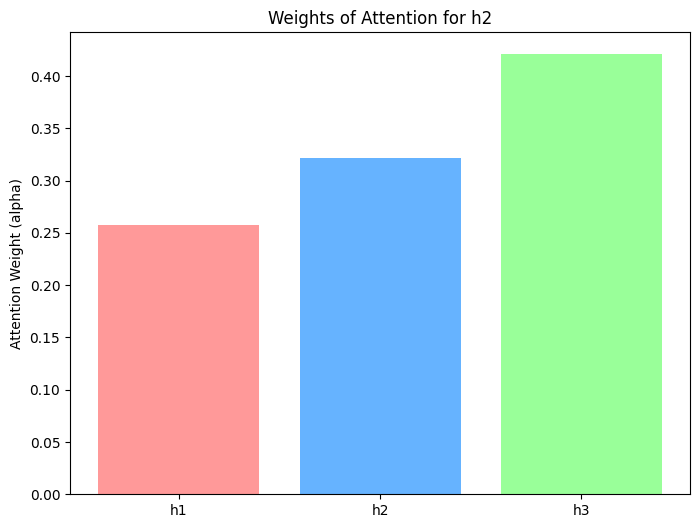

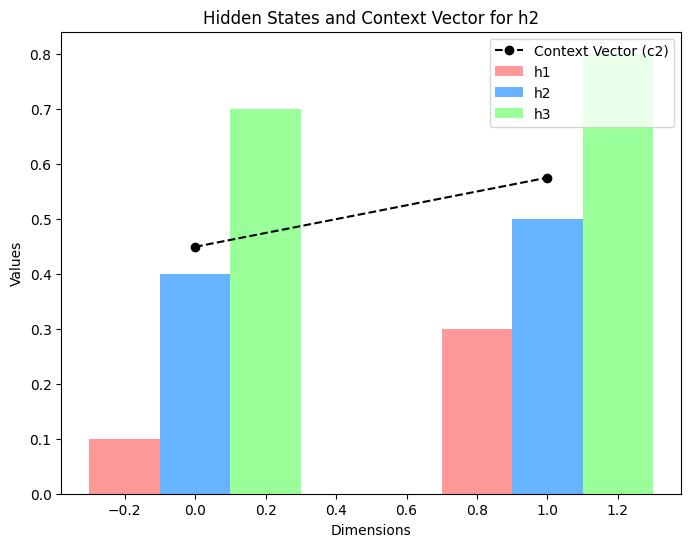

(array([0.44891069, 0.57469456]), array([0.25783875, 0.32128687, 0.42087438]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Входные скрытые состояния (h1, h2, h3)
h1 = np.array([0.1, 0.3])
h2 = np.array([0.4, 0.5])
h3 = np.array([0.7, 0.8])

# Скрытые состояния
h = [h1, h2, h3]

# Шаг 1: Вычисление оценок внимания e_{2k} для всех k (скалярное произведение)
e21 = np.dot(h2, h1)  # h2^T * h1
e22 = np.dot(h2, h2)  # h2^T * h2
e23 = np.dot(h2, h3)  # h2^T * h3

# Шаг 2: Применение softmax для получения весов внимания alpha_{2k}
e = np.array([e21, e22, e23])
alpha = np.exp(e) / np.sum(np.exp(e))  # softmax

# Шаг 3: Вычисление контекстного вектора c2
c2 = alpha[0] * h1 + alpha[1] * h2 + alpha[2] * h3

# Шаг 4: Визуализация весов внимания и контекстного вектора
labels = ['h1', 'h2', 'h3']
colors = ['#ff9999','#66b3ff','#99ff99']

# Визуализация весов внимания
plt.figure(figsize=(8, 6))
plt.bar(labels, alpha, color=colors)
plt.title('Weights of Attention for h2')
plt.ylabel('Attention Weight (alpha)')
plt.show()

# Визуализация скрытых состояний и контекстного вектора
plt.figure(figsize=(8, 6))
x = np.arange(len(h1))
bar_width = 0.2

# Скрытые состояния
plt.bar(x - bar_width, h1, width=bar_width, label='h1', color='#ff9999')
plt.bar(x, h2, width=bar_width, label='h2', color='#66b3ff')
plt.bar(x + bar_width, h3, width=bar_width, label='h3', color='#99ff99')

# Контекстный вектор c2
plt.plot(x, c2, 'k--', label='Context Vector (c2)', marker='o')

plt.title('Hidden States and Context Vector for h2')
plt.xlabel('Dimensions')
plt.ylabel('Values')
plt.legend()
plt.show()

c2, alpha  # Вывод контекстного вектора и весов внимания


Контекстный вектор $c_2$ после применения механизма внимания:

$$
c_2 = \begin{pmatrix} 0.4489 \\ 0.5747 \end{pmatrix}
$$

Веса внимания $\alpha$ для каждого скрытого состояния $h_1, h_2, h_3$:

$$
\alpha_{21} = 0.258, \quad \alpha_{22} = 0.321, \quad \alpha_{23} = 0.421
$$

Визуализация показала распределение весов внимания между скрытыми состояниями и их влияние на контекстный вектор $c_2$.






### Вопросы для самопроверки:

1. Что такое механизм внимания и зачем он используется в моделях с LSTM?
2. Как вычисляются оценки внимания $e_{tk}$ для каждого временного шага в механизме внимания?
3. Что представляет собой функция softmax и какую роль она играет в механизме внимания?
4. Какое влияние оказывают веса внимания $\alpha_{tk}$ на вычисление контекстного вектора?
5. Как вычисляется контекстный вектор $c_t$ на каждом шаге модели?
6. В чем заключается основное отличие механизма внимания от простой модели LSTM без внимания?
7. Какие параметры механизма внимания являются обучаемыми?
8. Какова роль скрытых состояний $h_t$ при вычислении контекстного вектора?
9. Как механизм внимания улучшает способность модели обрабатывать длинные последовательности?
10. Как функция softmax помогает нормализовать веса внимания?
11. Как производится конкатенация скрытого состояния и контекстного вектора для обновления скрытого состояния?
12. В каких случаях применение механизма внимания особенно полезно?
13. Какие типы механизмов внимания существуют, и как они различаются?
14. Почему в механизме внимания обычно используется функция активации $\tanh$ или $ReLU$?
15. Как изменяется поведение модели с механизмом внимания при увеличении длины входной последовательности?

### Задачи для самостоятельной работы:

#### Задачи на вычисление оценок внимания:

1. Для векторов скрытых состояний $h_1 = (0.2, 0.5), h_2 = (0.3, 0.7), h_3 = (0.4, 0.8)$ вычислите оценки внимания $e_{2k}$ для каждого временного шага.
2. Вычислите оценки внимания $e_{tk}$ для последовательности скрытых состояний $h_1 = (0.1, 0.2), h_2 = (0.2, 0.3), h_3 = (0.3, 0.4), h_4 = (0.4, 0.5)$, если используется скалярное произведение для оценки.
3. Найдите оценки внимания для следующих скрытых состояний: $h_1 = (0.6, 0.7), h_2 = (0.5, 0.4), h_3 = (0.8, 0.9)$ и временного шага $t = 1$.
4. Если оценки внимания $e_{21} = 0.3, e_{22} = 0.5, e_{23} = 0.7$, найдите веса внимания с помощью softmax.
5. Дана последовательность скрытых состояний $h_1 = (0.4, 0.6), h_2 = (0.3, 0.2), h_3 = (0.5, 0.7)$. Найдите оценки внимания для шага $t = 3$.

#### Задачи на вычисление весов внимания:

6. Вычислите веса внимания $\alpha_{tk}$ для оценок внимания $e_{21} = 0.4, e_{22} = 0.6, e_{23} = 0.8$.
7. Для последовательности скрытых состояний $h_1 = (0.3, 0.4), h_2 = (0.5, 0.6), h_3 = (0.7, 0.8)$ и временного шага $t = 2$, вычислите веса внимания, используя softmax.
8. Даны оценки внимания $e_{31} = 0.1, e_{32} = 0.3, e_{33} = 0.5$. Найдите веса внимания для временного шага $t = 3$.
9. Найдите нормализованные веса внимания $\alpha_{tk}$ для оценок $e_{21} = 0.2, e_{22} = 0.4, e_{23} = 0.6$.
10. Если оценки внимания равны $e_{11} = 0.5, e_{12} = 0.3, e_{13} = 0.7$, найдите веса внимания с помощью softmax.

#### Задачи на вычисление контекстных векторов:

11. Вычислите контекстный вектор $c_2$, если скрытые состояния $h_1 = (0.3, 0.6), h_2 = (0.4, 0.5), h_3 = (0.7, 0.9)$ и веса внимания $\alpha_{21} = 0.2, \alpha_{22} = 0.3, \alpha_{23} = 0.5$.
12. Для скрытых состояний $h_1 = (0.2, 0.4), h_2 = (0.3, 0.5), h_3 = (0.6, 0.8)$ и весов внимания $\alpha_{21} = 0.4, \alpha_{22} = 0.3, \alpha_{23} = 0.3$, вычислите контекстный вектор $c_2$.
13. Найдите контекстный вектор $c_3$ для скрытых состояний $h_1 = (0.1, 0.2), h_2 = (0.3, 0.4), h_3 = (0.5, 0.7)$ и весов внимания $\alpha_{31} = 0.25, \alpha_{32} = 0.35, \alpha_{33} = 0.4$.
14. Дана последовательность скрытых состояний $h_1 = (0.2, 0.3), h_2 = (0.4, 0.5), h_3 = (0.6, 0.7)$ и веса внимания $\alpha_{21} = 0.5, \alpha_{22} = 0.3, \alpha_{23} = 0.2$. Найдите контекстный вектор для шага $t = 2$.
15. Найдите контекстный вектор для шага $t = 1$, если скрытые состояния $h_1 = (0.1, 0.3), h_2 = (0.2, 0.4), h_3 = (0.3, 0.6)$ и веса внимания $\alpha_{11} = 0.3, \alpha_{12} = 0.4, \alpha_{13} = 0.3$.

#### Задачи на обновление скрытого состояния:

16. Для скрытого состояния $h_2 = (0.4, 0.5)$ и контекстного вектора $c_2 = (0.5, 0.7)$ найдите обновленное скрытое состояние $\tilde{h}_2$, если матрица $W_h = \begin{pmatrix} 1 & 0 & 0 & 1 \\ 0 & 1 & 1 & 0 \end{pmatrix}$.
17. Дана матрица $W_h = \begin{pmatrix} 1 & 0 & 0 & 1 \\ 0 & 1 & 1 & 0 \end{pmatrix}$, скрытое состояние $h_3 = (0.6, 0.7)$ и контекстный вектор $c_3 = (0.7, 0.8)$. Найдите обновленное скрытое состояние $\tilde{h}_3$.
18. Найдите обновленное скрытое состояние $\tilde{h}_1$, если $h_1 = (0.2, 0.4)$, контекстный вектор $c_1 = (0.3, 0.5)$ и $W_h = \begin{pmatrix} 1 & 0 & 0 & 1 \\ 0 & 1 & 1 & 0 \end{pmatrix}$.
19. Вычислите обновленное скрытое состояние для шага $t = 2$, если скрытое состояние $h_2 = (0.5, 0.6)$, контекстный вектор $c_2 = (0.6, 0.7)$ и матрица $W_h$.
20. Найдите обновленное скрытое состояние $\tilde{h}_2$ для шага $t = 2$, если $h_2 = (0.4, 0.5)$, $c_2 = (0.5, 0.6)$ и матрица $W_h = \begin{pmatrix} 1 & 1 & 0 & 0 \\ 0 & 0 & 1 & 1 \end{pmatrix}$.

#### Задачи на комбинированные вычисления:

21. Для скрытых состояний $h_1, h_2, h_3$ и весов $\alpha_{21}, \alpha_{22}, \alpha_{23}$ найдите итоговое скрытое состояние с учетом контекстного вектора.
22. Вычислите итоговое скрытое состояние на основе скрытых состояний и весов внимания, если скрытые состояния равны $h_1 = (0.1, 0.2), h_2 = (0.2, 0.3), h_3 = (0.3, 0.4)$ и веса $\alpha_{21} = 0.3, \alpha_{22} = 0.4, \alpha_{23} = 0.3$.
23. Найдите итоговое скрытое состояние $\tilde{h}_3$ на основе контекстного вектора и скрытых состояний, если $h_3 = (0.6, 0.7)$ и $c_3 = (0.8, 0.9)$.
24. Вычислите итоговое скрытое состояние для шагов $t = 1, 2, 3$, если даны скрытые состояния и веса.
25. Дано три скрытых состояния и соответствующие веса. Найдите итоговое скрытое состояние после применения механизма внимания.
26. Для четырех скрытых состояний и весов внимания вычислите итоговое скрытое состояние, учитывающее механизм внимания.
27. Найдите итоговое скрытое состояние $\tilde{h}_1$ для шага $t = 1$ с использованием весов внимания и контекстного вектора.
28. Вычислите итоговое скрытое состояние $\tilde{h}_2$ для шага $t = 2$, если известны скрытые состояния и веса.
29. Найдите итоговое скрытое состояние $\tilde{h}_3$ на основе контекстного вектора и весов для шага $t = 3$.
30. Вычислите итоговое скрытое состояние, используя три скрытых состояния и их веса внимания, для временного шага $t$.





